In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read City data file and store it as dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [ ]:
# Get columns and rows of city data that are not null
city_data_df.count()

In [ ]:
# Get data types of each column
city_data_df.dtypes

In [ ]:
# Get unique values for each type of city
city_data_df["type"].unique()

In [ ]:
# Get number of data points from urban city type
sum(city_data_df['type']== 'Urban')

In [ ]:
# Get number of data points from suburban city type
sum(city_data_df['type']== 'Suburban')

In [ ]:
# Get number of data points from rural city type
sum(city_data_df['type']== 'Rural')

In [ ]:
# Get columns and rows that are not null from ride data
ride_data_df.count()

In [ ]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

In [ ]:
# Get the data types of each column.
ride_data_df.dtypes

In [7]:
# Merge ride and city dataframes, left merge, on city column index
pyber_data_df= pd.merge(ride_data_df,city_data_df, how= "left", on=['city', 'city'])
# Display new merged dataframe
#pyber_data_df.head()

In [8]:
# Create urban cities dataframe
urban_cities_df= pyber_data_df[pyber_data_df['type']== 'Urban']

In [9]:
# Create suburban and rural dataframes
suburban_cities_df= pyber_data_df[pyber_data_df['type']== 'Suburban']
rural_cities_df= pyber_data_df[pyber_data_df['type']== 'Rural']

In [10]:
# Use .groupby to create series with number of rides for urban cities
urban_ride_count= urban_cities_df.groupby(['city']).count()['ride_id']
# urban_ride_count.head()

In [11]:
# Create series for number of rides in suburban cities using .groupby using cities as index
suburban_ride_count= suburban_cities_df.groupby(['city']).count()['ride_id']
# suburban_ride_count.head()

In [12]:
# Create series for number of rides in rural cities using .groupby with cities as index
rural_ride_count= rural_cities_df.groupby(['city']).count()['ride_id']
# rural_ride_count.head()

In [13]:
# Get average fare for all cities of each type using .groupby, with city as the index and .mean()['fare'] as value
urban_avg_fare= urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare= suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare= rural_cities_df.groupby(['city']).mean()['fare']
# print(urban_avg_fare.head())
# print(suburban_avg_fare.head())
# print(rural_avg_fare.head())

In [14]:
# Get average number of drivers for all cities of each type using .groupby, with city as the index and .mean()['driver_count']
urban_driver_count= urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count= suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count= rural_cities_df.groupby(['city']).mean()['driver_count']

In [ ]:
# Now that we have created 1. datasets for each city type, 2. average fare for each city in each type
# and 3. average drivers in each city of each type
# Create bubble chart for each city type, starting with Urban at this step
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, 
            c='coral', edgecolor= 'black', linewidths=1,
            alpha= .8, label= "Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
# Add Legend
plt.legend()
            

In [ ]:
# Create Suburban bubble chart
plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count,
           c="skyblue", edgecolor= "black", linewidths=1,
           alpha=.8, label= "Suburban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
# Add Legend
plt.legend()

In [ ]:
# Create Rural bubble Chart
plt.scatter(rural_ride_count,rural_avg_fare,s= 10*rural_driver_count,
           c="gold", edgecolor= "black", linewidths=1,
           alpha=.8, label= "Rural")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
# Add Legend
plt.legend()

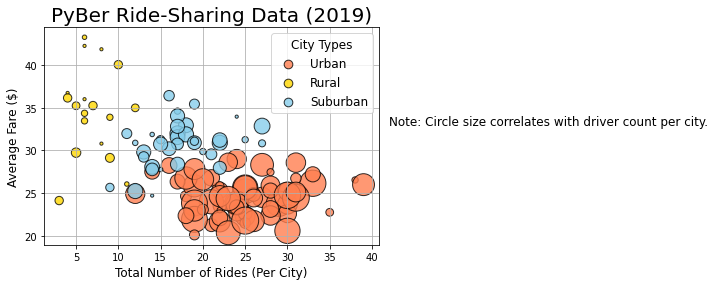

In [31]:
# Combine previous three charts into one
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, 
            c='coral', edgecolor= 'black', linewidths=1,
            alpha= .8, label= "Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)

plt.scatter(rural_ride_count,rural_avg_fare,s= 10*rural_driver_count,
           c="gold", edgecolor= "black", linewidths=1,
           alpha=.8, label= "Rural")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)

plt.scatter(suburban_ride_count,suburban_avg_fare, s=10*suburban_driver_count,
           c="skyblue", edgecolor= "black", linewidths=1,
           alpha=.8, label= "Suburban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add Legend
plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 33, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()

In [ ]:
# Get summary statistics
urban_cities_df.describe()

In [ ]:
suburban_cities_df.describe()

In [ ]:
rural_cities_df.describe()

In [ ]:
rural_ride_count.describe()

In [ ]:
# Calculate the mean ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

In [ ]:
# Calculate the median ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

In [ ]:
# Calculate the mode of ride count for urban cities
suburban_ride_count.mode()

In [16]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [ ]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

In [ ]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)
print(mode_suburban_ride_count)
print(mode_rural_ride_count)

In [18]:
# Get the fares for each city type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [19]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [21]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")


The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [22]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")


The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [24]:
# Get the driver count data from each city type
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [26]:
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

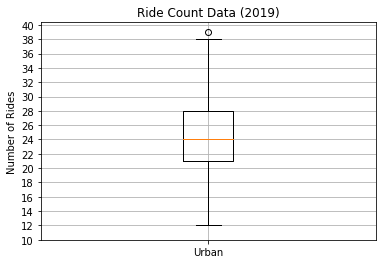

In [27]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

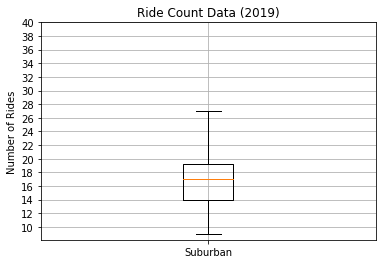

In [28]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

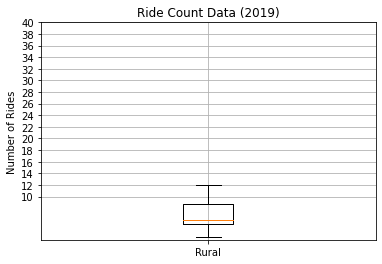

In [29]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

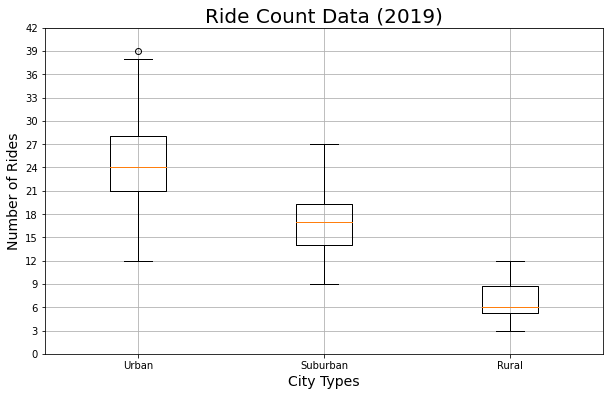

In [30]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [32]:
# Get the city that matches 39. This identifies the outlier in the urban box plot
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


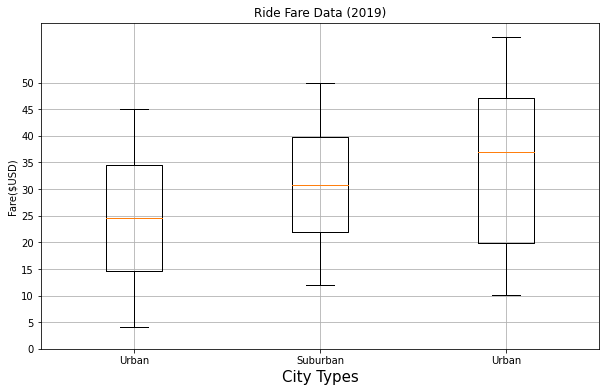

In [39]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban","Suburban","Urban"]
fare_data= [urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_xlabel("City Types", fontsize=15)
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

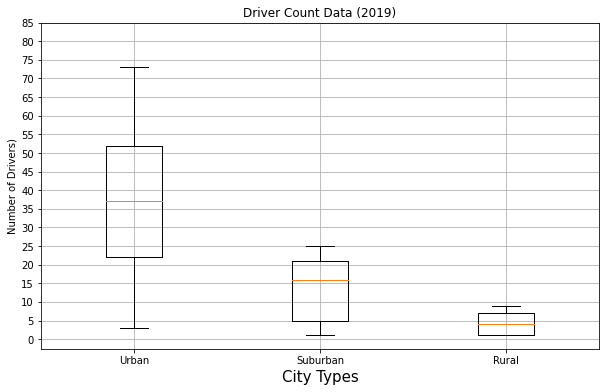

In [41]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_data= [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_xlabel('City Types', fontsize=15)
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()


In [45]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

([<matplotlib.patches.Wedge at 0x7ffd9ce513d0>,
 [Text(1.0749106638891923, 0.23359594315247792, 'Rural'),
  Text(0.20317017984928465, 1.0810744091042066, 'Suburban'),
  Text(-0.4281129149941135, -1.013271598346289, 'Urban')])

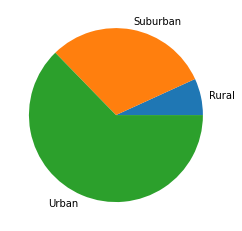

In [46]:
plt.pie(type_percents, labels= ["Rural", "Suburban", "Urban"])

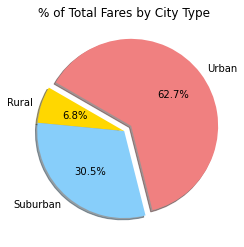

In [47]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()